# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
### DBSCAN is an unsupervised learning algorithm that groups data points into clusters based on their density, connecting regions of high point concentration while marking sparse areas as noise. It excels in segmenting mall customers (e.g., grouping shoppers based on annual income and spending score) into arbitrarily shaped clusters, requiring no prior specification of the number of clusters. The algorithm assumes that clusters are areas of higher density separated by regions of lower density, which simplifies the process but may not hold for datasets with uniform density or significant noise. Its strength lies in its ability to handle outliers and irregular cluster shapes, but it can be sensitive to the choice of distance threshold (eps) and minimum points (min_samples), necessitating careful parameter tuning for optimal performance.

### Use DBSCAN as an exploratory tool for unsupervised learning prototypes, with density analysis to set eps and min_samples, particularly for deployment in anomaly detection or customer micro-segmentation systems.

| Aspect | Details |
| :- | :- |
| Use For           | Customer segmentation (e.g., mall shopper grouping, fraud detection)<br>Can be extended to outlier detection or spatial data analysis |
| Key Assumptions   | - Clusters are dense regions separated by sparser areas<br>- Independent observations<br>- Sufficient data density for cluster identification |
| Advantages        | - Handles arbitrary cluster shapes and sizes<br>- Automatically detects outliers as noise<br>- Requires no predefined cluster number |
| Disadvantages     | - Sensitive to eps and min_samples parameters<br>- Computationally intensive for large datasets<br>- Struggles with varying density clusters |
| Avoid When        | - Datasets with uniform density or significant noise<br>- Very large datasets requiring low latency<br>- Need for highly interpretable models |
| Real-World Use Case | Mall customer segmentation (e.g., grouping shoppers by income and spending with outlier detection)<br>Anomaly detection (e.g., identifying unusual network traffic patterns) |

## Problem Description: 
### Segment mall customers into clusters based on annual income and spending score, identifying dense regions while marking outliers as noise. This is an unsupervised learning problem where DBSCAN groups points based on density, requiring no predefined number of clusters.

Using Kaggle dataset https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
project_dir = './11_dbscan_density_based_spatial_clustering'

# load  dataset
data = pd.read_csv(project_dir + '/data/Mall_Customers.csv')
print("Dataset loaded, shape:", data.shape)

# select relevant features
features = ['Annual Income (k$)', 'Spending Score (1-100)']

X = data[features]
print("Features shape:", X.shape)

# scale features for better K-Means performance (needed because of distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset loaded, shape: (200, 5)
Features shape: (200, 2)


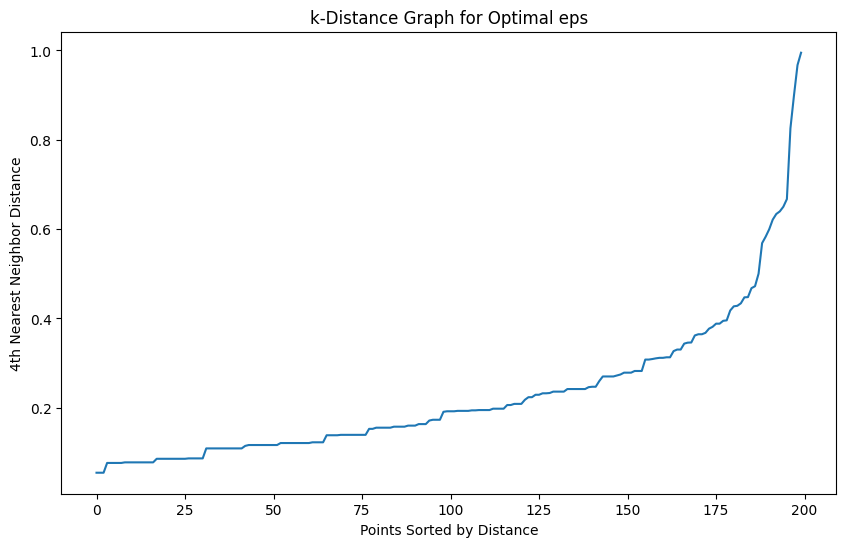

In [3]:
# determine optimal eps using a k-distance graph (k=4 as a common choice for min_samples)
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)
distances = np.sort(distances[:, 3], axis=0)  
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Graph for Optimal eps')
plt.xlabel('Points Sorted by Distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [4]:
# train the DBSCAN model with estimated parameters
# optimal eps can be chosen where the k-distance graph shows an "elbow" (e.g., ~0.5-1.0)
eps = 0.5  # Adjust based on k-distance graph
min_samples = 4  # Minimum points in a neighborhood
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model.fit(X_scaled)

# add cluster labels to the original data (noise labeled as -1)
data['Cluster'] = dbscan_model.labels_

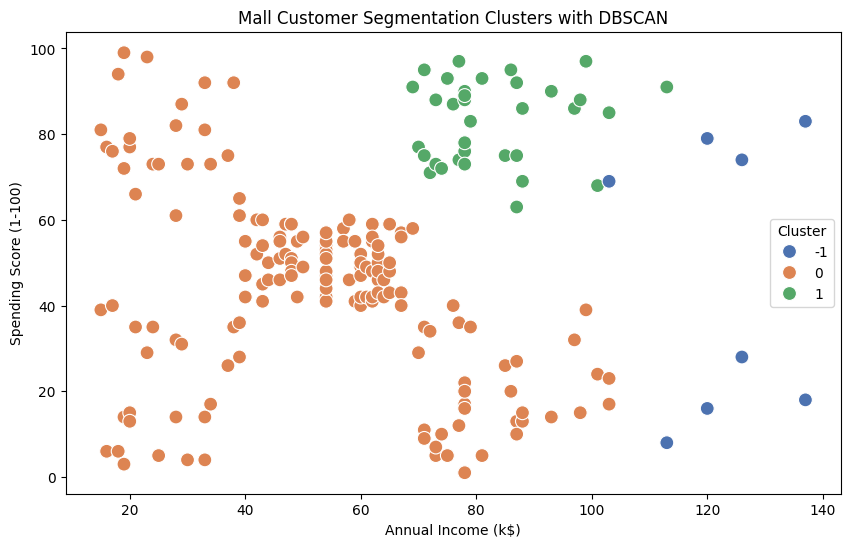

In [5]:
# visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation Clusters with DBSCAN')
plt.legend(title='Cluster')
plt.show()

In [7]:
# save the trained model to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'mall_customer_dbscan_model.pkl')
scaler_filename = os.path.join(model_dir, 'mall_customer_scaler.pkl')
joblib.dump(dbscan_model, model_filename)
joblib.dump(scaler, scaler_filename)
print(f'Model saved as {model_filename}')
print(f'Scaler saved as {scaler_filename}')

Model saved as ./11_dbscan_density_based_spatial_clustering/model/mall_customer_dbscan_model.pkl
Scaler saved as ./11_dbscan_density_based_spatial_clustering/model/mall_customer_scaler.pkl


In [14]:
# load the model and scaler, and run a prediction test
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
sample_data = pd.DataFrame(
    [[60, 40]],  # example values for annual income and spending score
    columns=features
)
sample_input_scaled = loaded_scaler.transform(sample_data)
sample_cluster = loaded_model.fit_predict(sample_input_scaled)  
print(f'Predicted Cluster for sample input: {sample_cluster[0]}')

Predicted Cluster for sample input: -1
